# Assignment 4

## Code dump
### webget & process_image

In [1]:
!cat webget.py

###############################################
#
# Title:	webget.py
#
# Descr:	Download file from URL
#
# Author:	Tarllark
#
# Team:		Successful Story
#
###############################################

import sys
import os
import urllib.request
from urllib.parse import urlparse
import shutil

def download(url, to=None):
	if to == None:
		file_name = urlparse(url).path.split('/')[-1]
	else:
		file_name = to + urlparse(url).path.split('/')[-1]
	with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
		shutil.copyfileobj(response, out_file)
	return file_name


In [2]:
!cat process_image.py

from webget import download  as wget
import matplotlib.pyplot as plt
import cv2

img_url = "https://static.independent.co.uk/s3fs-public/thumbnails/image/2017/10/09/11/faces-1.jpg"

def process():
	img = cv2.imread(wget(img_url))

	eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
	face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
	grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	faces =  face_cascade.detectMultiScale(grey)
	
	for (x,y,w,h) in faces:
		cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
		roi_grey = grey[y:y+h, x:x+w]
		roi_color = img[y:y+h, x:x+w]
		eyes = eye_cascade.detectMultiScale(roi_grey)
		for (ex,ey,ew,eh) in eyes:
			cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
	
	tmp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	plt.imshow(tmp)
	
if __name__ == '__main__':
	
	process()
	plt.show()


## 1. Download picture (Since everything is done in one go, will just display the original image)

![](faces-1.jpg)

## 2. & 3. Mark faces and eyes using rectangles (Can be run from terminal for larger image)

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


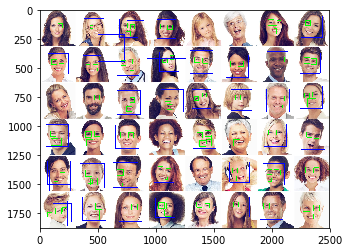

In [4]:
import process_image as proc_img

proc_img.process()